In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Sapienza/DL

/content/drive/MyDrive/Sapienza/DL


In [ ]:
import pickle
import pandas as pd
import numpy as np
import json
import itertools
import gensim
path="SEMEVAL-2021-task6-corpus/data/"


In [ ]:
with open('training_task1_labels.pkl', 'rb') as handle:
    train_labs = pickle.load(handle)

with open('training_task1_features.pkl', 'rb') as handle:
    train_feats = pickle.load(handle)

with open('training_task1_all_labels.pkl', 'rb') as handle:
    all_labels = pickle.load(handle)

with open('dev_task1_labels.pkl', 'rb') as handle:
    dev_labs = pickle.load(handle)

with open('dev_task1_features.pkl', 'rb') as handle:
    dev_feats = pickle.load(handle)

with open('test_task1_labels.pkl', 'rb') as handle:
    test_labs = pickle.load(handle)

with open('test_task1_features.pkl', 'rb') as handle:
    test_feats = pickle.load(handle)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_feats)
X_train_counts.shape

(688, 3204)

In [ ]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(688, 3204)

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(688, 3204)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,n_jobs=4)
clf.fit(X_train_tfidf, train_labs)

RandomForestClassifier(n_jobs=4)

In [ ]:
clf.score(X_train_tfidf,train_labs)

0.9956395348837209

In [ ]:
dev_counts=count_vect.transform(dev_feats)
dev=tfidf_transformer.transform(dev_counts)
clf.score(dev,dev_labs)

0.14285714285714285

In [ ]:
test_counts=count_vect.transform(test_feats)
test=tfidf_transformer.transform(test_counts)
clf.score(test,test_labs)

0.105

In [ ]:
# without text preprocessing=0.11 accuracy

# with preprocessing (punc, lower, stem, lemmatize, stop removal)= 0.19 accuracy

# with preprocessing (punc, lower)= 0.14 accuracy

In [ ]:
with open('training_task1_labels.pkl', 'rb') as handle:
    train_labs = pickle.load(handle)

with open('training_task1_features_w2v.pkl', 'rb') as handle:
    train_feats = pickle.load(handle)

with open('training_task1_all_labels.pkl', 'rb') as handle:
    all_labels = pickle.load(handle)

with open('dev_task1_labels.pkl', 'rb') as handle:
    dev_labs = pickle.load(handle)

with open('dev_task1_features_w2v.pkl', 'rb') as handle:
    dev_feats = pickle.load(handle)

with open('test_task1_labels.pkl', 'rb') as handle:
    test_labs = pickle.load(handle)

with open('test_task1_features_w2v.pkl', 'rb') as handle:
    test_feats = pickle.load(handle)


train_feats=np.reshape(train_feats,(len(train_feats),-1))
dev_feats=np.reshape(dev_feats,(len(dev_feats),-1))
test_feats=np.reshape(test_feats,(len(test_feats),-1))

clf = RandomForestClassifier(n_estimators=100,n_jobs=4)
clf.fit(train_feats, train_labs)

clf.score(train_feats,train_labs)

0.10319767441860465

In [ ]:
with open('training_task1_labels.pkl', 'rb') as handle:
    train_labs = pickle.load(handle)

with open('training_task1_features_w2v.pkl', 'rb') as handle:
    train_feats = pickle.load(handle)

with open('training_task1_all_labels.pkl', 'rb') as handle:
    all_labels = pickle.load(handle)

with open('dev_task1_labels.pkl', 'rb') as handle:
    dev_labs = pickle.load(handle)

with open('dev_task1_features_w2v.pkl', 'rb') as handle:
    dev_feats = pickle.load(handle)

with open('test_task1_labels.pkl', 'rb') as handle:
    test_labs = pickle.load(handle)

with open('test_task1_features_w2v.pkl', 'rb') as handle:
    test_feats = pickle.load(handle)


In [ ]:
train_feats.shape

(688, 32, 256)

In [ ]:
from keras.layers import LSTM, Input, Dense, Flatten, Bidirectional, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam

adam=Adam()

# making the LSTM model
inp=Input(shape=(32,256))
#x=Bidirectional(LSTM(128, return_sequences=True))(inp)
#x=Dropout(0.2)(x)
x=LSTM(128)(inp)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
out=Dense(23,activation='softmax')(x)

model=Model(inp,out)
model.summary()

#adam=Adam(lr=0.0001)

model.compile(adam,loss='categorical_crossentropy',metrics=['acc'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 256)]         0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               197120    
                                                                 
 dense_4 (Dense)             (None, 1024)              132096    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 23)                23575     
                                                                 
Total params: 352,791
Trainable params: 352,791
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_tfidf

array(<688x2508 sparse matrix of type '<class 'numpy.float64'>'
	with 6552 stored elements in Compressed Sparse Row format>, dtype=object)

In [ ]:
X_train_tfidf=np.expand_dims(X_train_tfidf.toarray(),axis=2)
dev=np.expand_dims(dev.toarray(),axis=2)
test=np.expand_dims(test.toarray(),axis=2)

Epoch 1/60
86/86 [==============================] - 6s 43ms/step - loss: 6.0248 - acc: 0.1453 - val_loss: 6.7410 - val_acc: 0.0476
Epoch 2/60
86/86 [==============================] - 3s 37ms/step - loss: 5.9137 - acc: 0.1032 - val_loss: 6.6231 - val_acc: 0.0476
Epoch 3/60
86/86 [==============================] - 3s 37ms/step - loss: 5.8115 - acc: 0.1032 - val_loss: 6.5148 - val_acc: 0.0476
Epoch 4/60
86/86 [==============================] - 3s 37ms/step - loss: 5.7139 - acc: 0.1032 - val_loss: 6.4120 - val_acc: 0.0476
Epoch 5/60
86/86 [==============================] - 3s 36ms/step - loss: 5.6228 - acc: 0.1032 - val_loss: 6.3174 - val_acc: 0.0476
Epoch 6/60
86/86 [==============================] - 3s 37ms/step - loss: 5.5383 - acc: 0.1032 - val_loss: 6.2295 - val_acc: 0.0476
Epoch 7/60
86/86 [==============================] - 3s 37ms/step - loss: 5.4590 - acc: 0.1032 - val_loss: 6.1460 - val_acc: 0.0476
Epoch 8/60
86/86 [==============================] - 3s 37ms/step - loss: 5.3850 - a

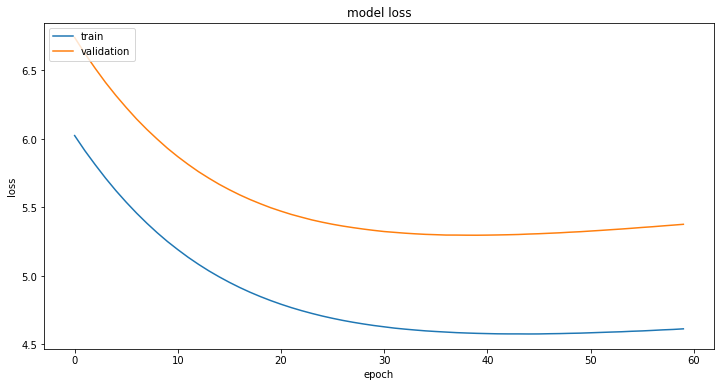

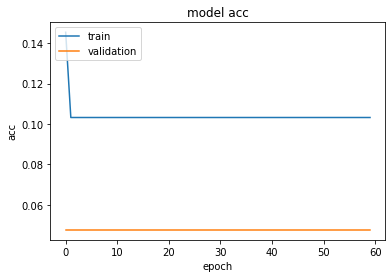

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


# training the model
history=model.fit(train_feats,train_labs,batch_size=8,epochs=60,
          validation_data=(dev_feats,dev_labs))

# plotting the validation and training loss i.e. "mean absolute error"
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.close()

plt.figure(figsize=(12,6))
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
from keras.layers import Conv1D, Input, Dense, Flatten, Bidirectional, Dropout, MaxPooling1D
from keras.models import Model
from tensorflow.keras.optimizers import Adam

adam=Adam()

# making the LSTM model
inp=Input(shape=(32,256))

x=Conv1D(128,5,activation='relu')(inp)
x=MaxPooling1D()(x)

x=Conv1D(256,5,activation='relu')(x)
x=MaxPooling1D()(x)

x=Flatten()(x)

x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
out=Dense(23,activation='softmax')(x)

model=Model(inp,out)
model.summary()

#adam=Adam(lr=0.0001)

model.compile(adam,loss='categorical_crossentropy',metrics=['acc'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 256)]         0         
                                                                 
 conv1d (Conv1D)             (None, 28, 128)           163968    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 256)           164096    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 1280)              0   

In [ ]:
from sklearn.preprocessing import Normalizer

norm=Normalizer()
train_feats=norm.fit_transform(np.reshape(train_feats,(len(train_feats),-1)))
dev_feats=norm.transform(np.reshape(dev_feats,(len(dev_feats),-1)))
test_feats=norm.transform(np.reshape(test_feats,(len(test_feats),-1)))

In [ ]:
train_feats=np.reshape(train_feats,(len(train_feats),32,256))
dev_feats=np.reshape(dev_feats,(len(dev_feats),32,256))
test_feats=np.reshape(test_feats,(len(test_feats),32,256))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


# training the model
history=model.fit(train_feats,train_labs,batch_size=8,epochs=60,
          validation_data=(dev_feats,dev_labs))

# plotting the validation and training loss i.e. "mean absolute error"
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.close()

plt.figure(figsize=(12,6))
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Epoch 1/60
86/86 [==============================] - 3s 33ms/step - loss: 4.6166 - acc: 0.1032 - val_loss: 5.3176 - val_acc: 0.0476
Epoch 2/60
86/86 [==============================] - 3s 32ms/step - loss: 4.6095 - acc: 0.1032 - val_loss: 5.3119 - val_acc: 0.0476
Epoch 3/60
86/86 [==============================] - 3s 32ms/step - loss: 4.6029 - acc: 0.1032 - val_loss: 5.3076 - val_acc: 0.0476
Epoch 4/60
86/86 [==============================] - 3s 33ms/step - loss: 4.5970 - acc: 0.1032 - val_loss: 5.3045 - val_acc: 0.0476
Epoch 5/60
86/86 [==============================] - 3s 32ms/step - loss: 4.5924 - acc: 0.1032 - val_loss: 5.3016 - val_acc: 0.0476
Epoch 6/60
86/86 [==============================] - 3s 33ms/step - loss: 4.5883 - acc: 0.1032 - val_loss: 5.3005 - val_acc: 0.0476
Epoch 7/60
86/86 [==============================] - 3s 32ms/step - loss: 4.5851 - acc: 0.1032 - val_loss: 5.2991 - val_acc: 0.0476
Epoch 8/60
86/86 [==============================] - 4s 50ms/step - loss: 4.5819 - a